In [7]:
import numpy as np

# 3d plot

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [5]:
def zfun(x, y):
    res = 20 * np.exp(-(np.power((x - 2.5), 2) + np.power((y + 1.5), 2)) / 5) + \
    3 * (1 + np.power(np.sin(0.08 * np.pi * x * y), 2)) + \
    3 * (np.log(2 + np.power((10 * (x - 2.4)), 4) + np.power((10 * (y + 1.3)), 4))) / \
    (1 + np.power(((np.power(x, 2)+np.power(y, 2)) / 100), 0.1))
    return res 

In [18]:
def plot_it(l, r, n, a, e):
    lx, rx = (l, r)
    ly, ry = (-r, -l)
    X = np.linspace(lx, rx, n)
    Y = np.linspace(ly, ry, n)
    xs, ys = np.meshgrid(X, Y)
    xs = xs.flatten()
    ys = ys.flatten()
    zs = zfun(xs, ys)
    fig = plt.figure(figsize=(20,20))
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(xs, ys, zs, cmap=cm.jet, linewidth=0.2)
    ax.scatter([0], [0], [zfun(0, 0)])
    ax.view_init(elev=e, azim=a)
    plt.show()

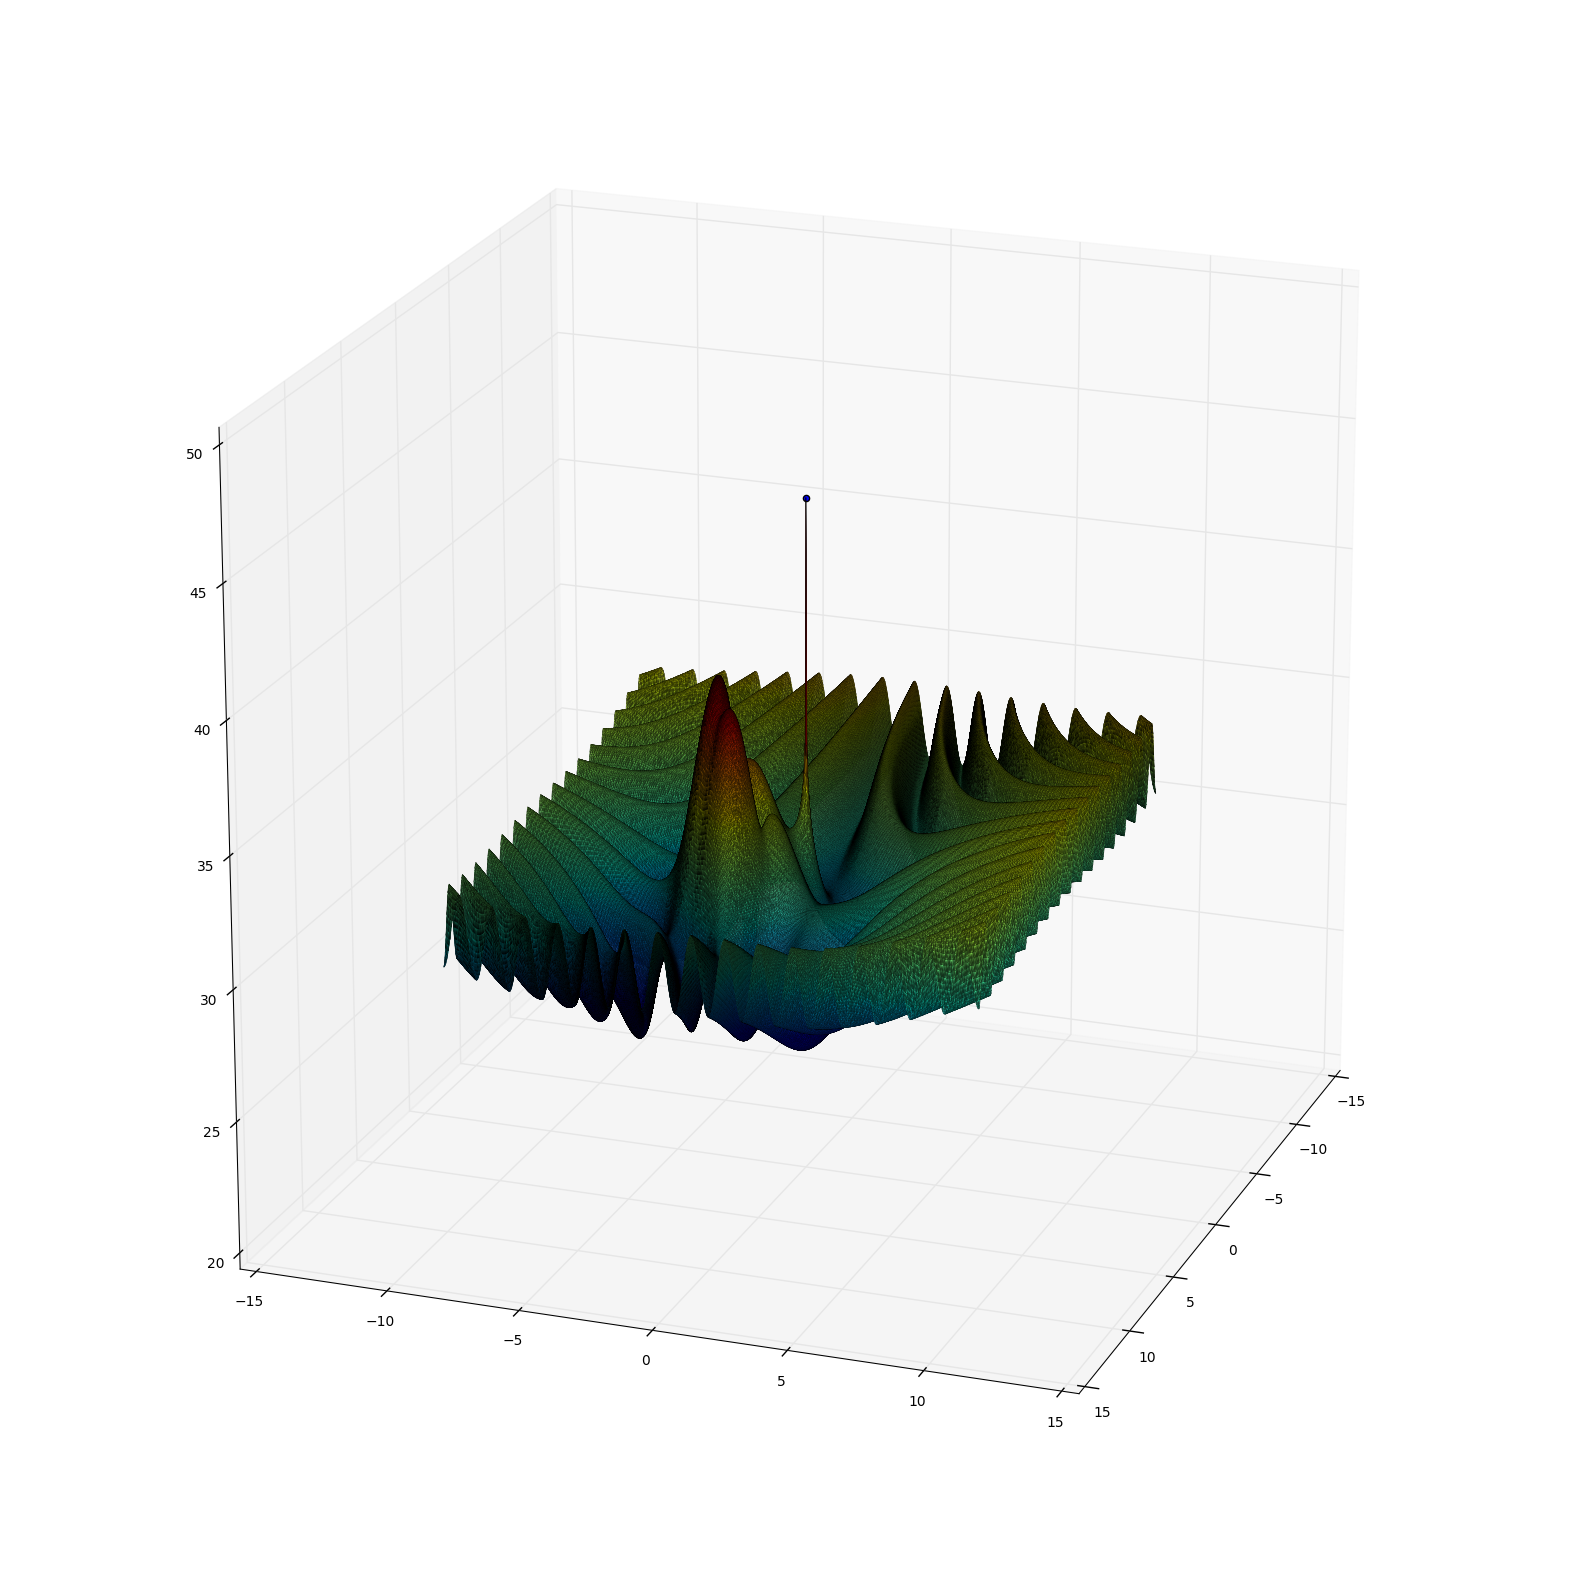

In [30]:
plot_it(-10, 10, 601, 20, 20)

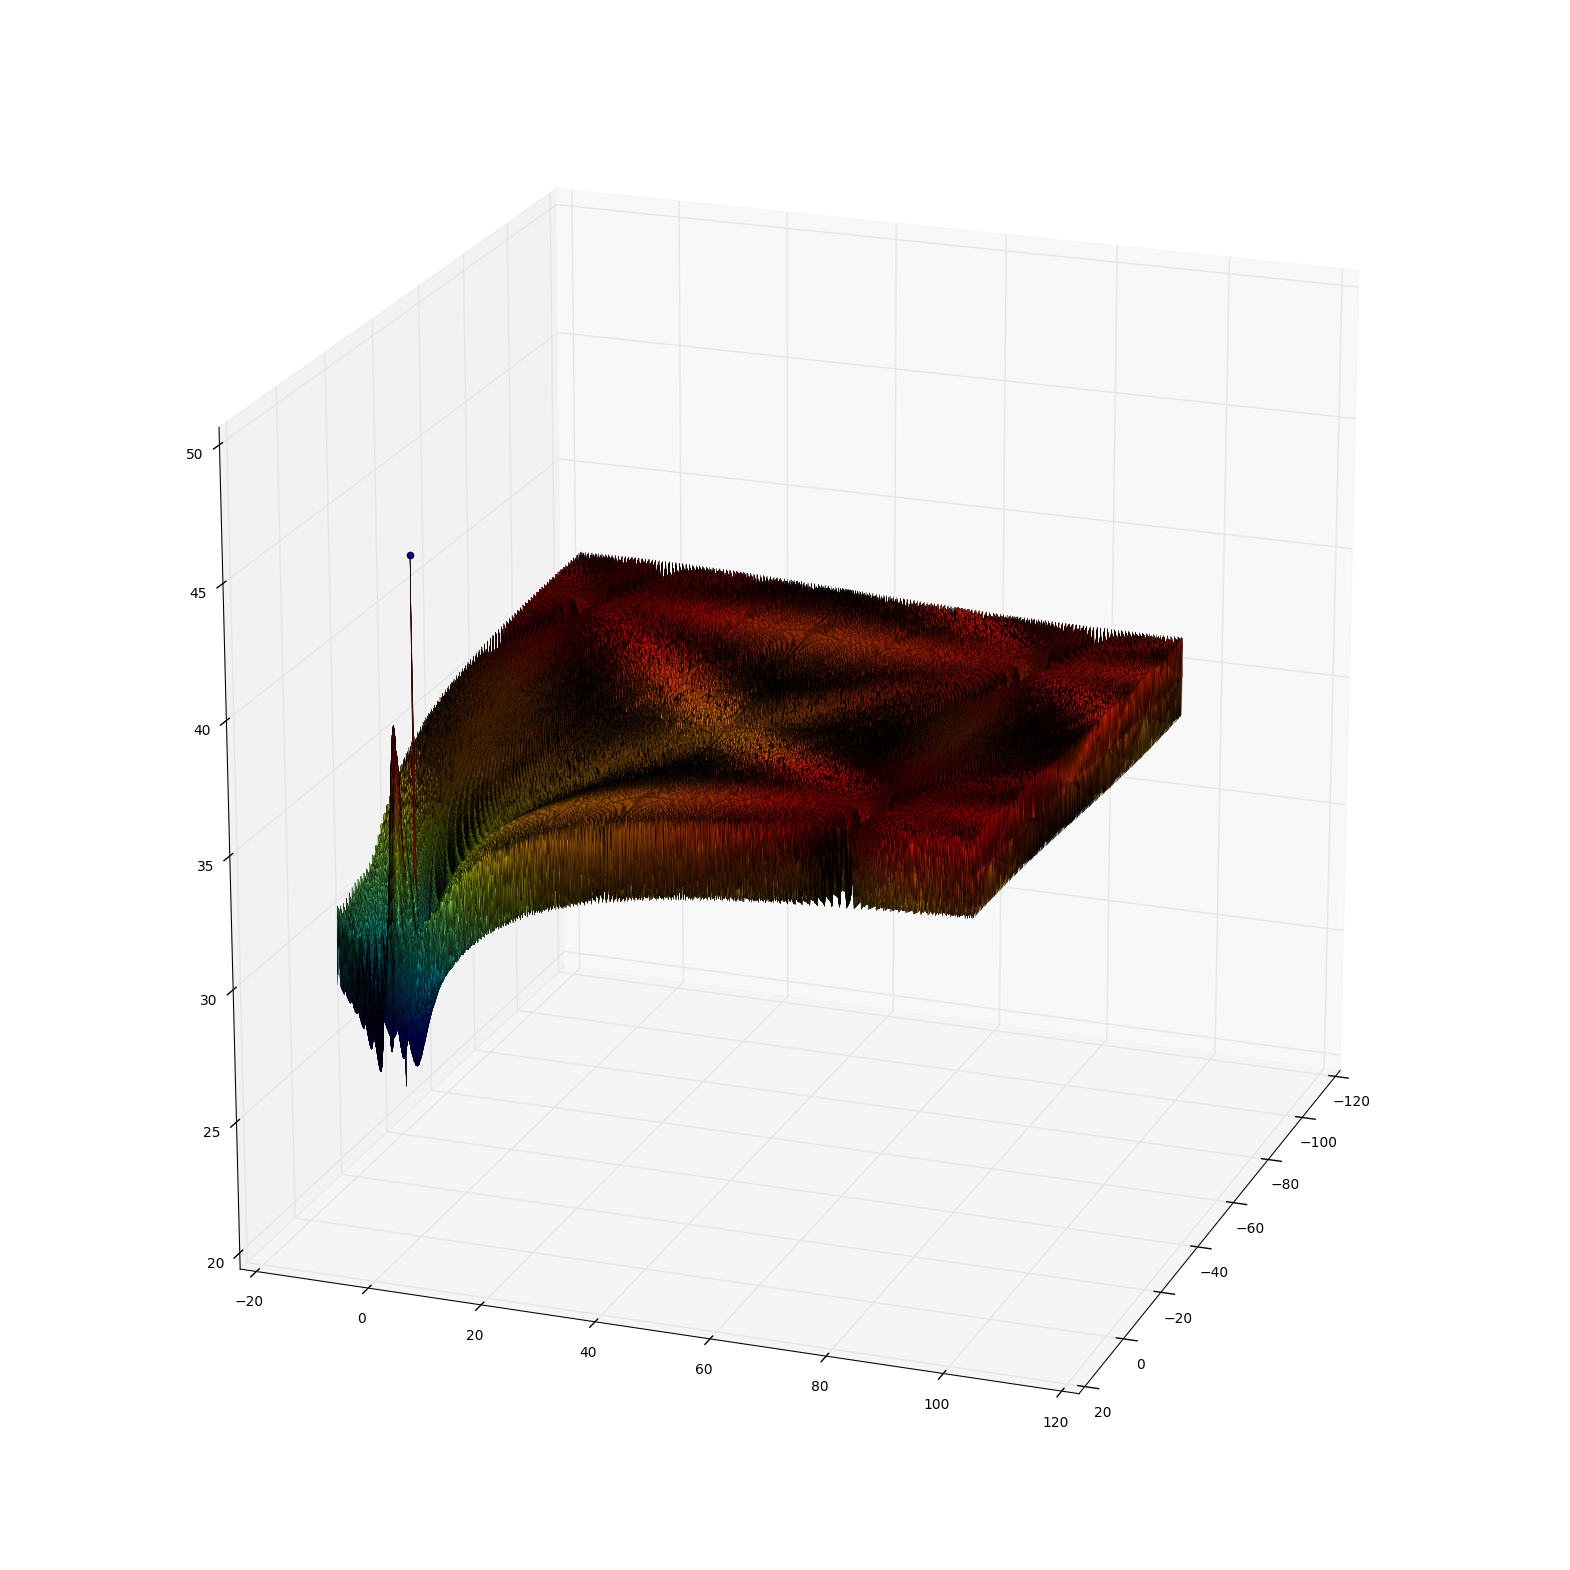

In [69]:
plot_it(-100, 10, 705, 20, 20)

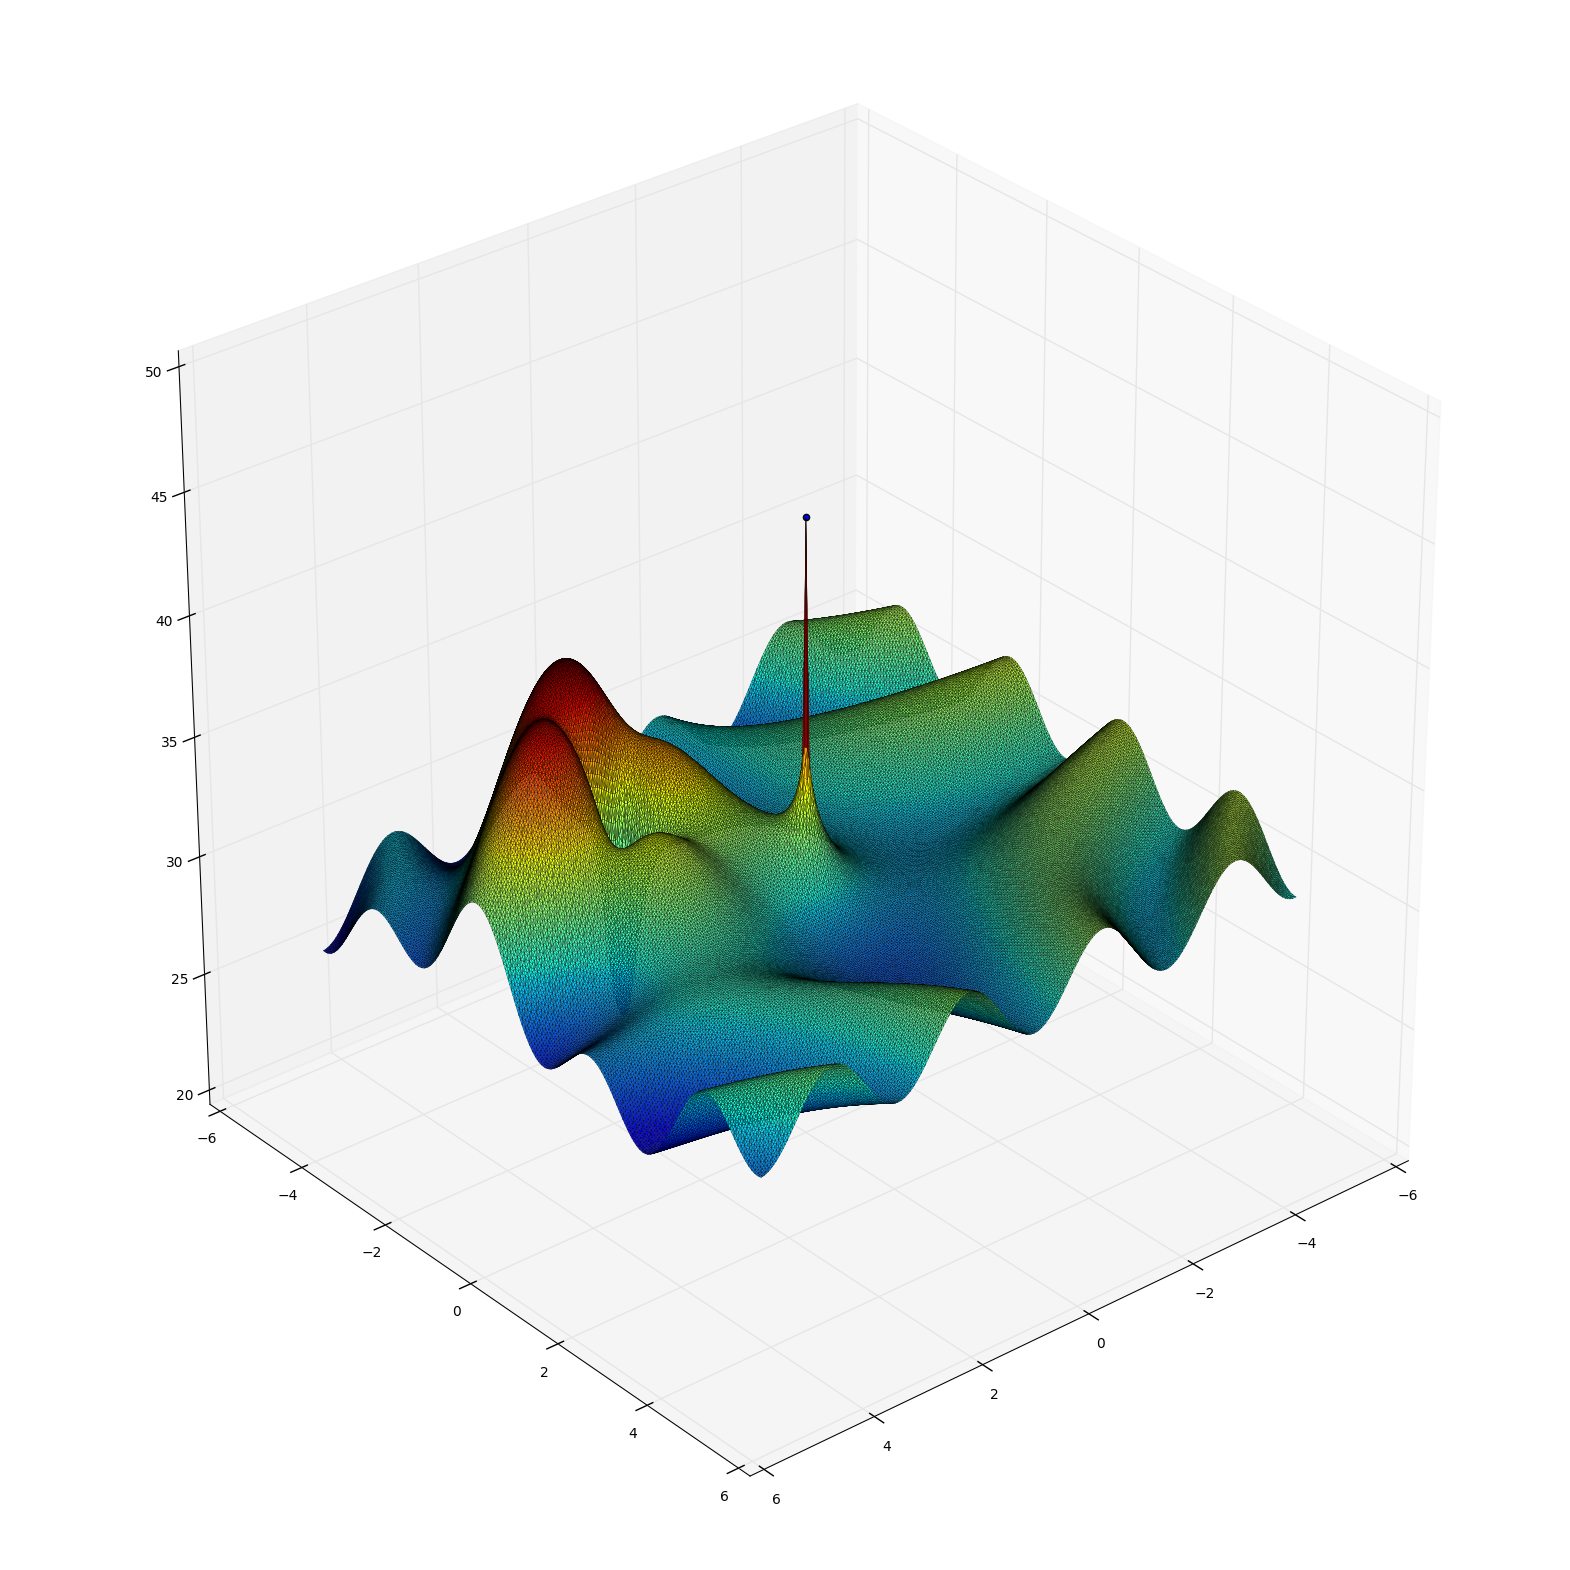

In [32]:
plot_it(-5, 5, 301, 50, 30)

# Monte Karlo

In [37]:
import numpy.random as rnd

In [34]:
def optimize(dist, n):
    def gen():
        for i in range(n):
            x, y = dist()
            yield ((x, y), zfun(x, y))
    return max(gen(), key=lambda p: p[1])

In [35]:
print("UNIFORM DISTRIBUTION")
at, val = optimize(lambda: rnd.uniform(-20, 20, 2), 1000000)
print("point: {}\nz(x, y) = {}".format(at, val))

UNIFORM DISTRIBUTION
point: (2.4764818301177556, -2.4020069723079196)
z(x, y) = 38.90254746531549


In [36]:
print("NORMAL DISTRIBUTION")
at, val = optimize(lambda: rnd.normal(0, 1, 2), 100000)
print("point: {}\nz(x, y) = {}".format(at, val))

NORMAL DISTRIBUTION
point: (2.5050846438525238, -2.3904770274034632)
z(x, y) = 38.90411558141693


# Cross Entropy

In [71]:
import scipy.optimize as opt

In [117]:
def exp_pdf(x, y, v1, v2):
    return (1/v1)*(1/v2)*np.exp(-(1/v1)*x-(1/v2)*y)

def gen_p(v1, v2):
    return (rnd.exponential(scale=v1), rnd.exponential(scale=v2))

In [159]:
def opt_f(ps, best_num, u1, u2):
    kbest = sorted([(p, zfun(p[0], p[1])) for p in ps], key=lambda pair: pair[1])[-best_num:]
    kbest_pts = [p for (p, z) in kbest]
    X = np.array([p[0] for p in kbest_pts])
    Y = np.array([p[1] for p in kbest_pts])
    def fun(v1, v2):
        return 1/len(ps) * np.sum(exp_pdf(X, Y, v1, v2) * np.log(exp_pdf(X, Y, u1, u2)) / exp_pdf(X, Y, u1, u2))
    return fun

In [160]:
def cem(n, k, v0, v1):
    # fixed number of iters
    for i in range(0, 100):
        # generating points from exp distribution
        pts = np.array([gen_p(v0, v1) for _ in range(n)])
        # function for opt. to get next parameter guess
        fun = opt_f(pts, k, v0, v1)
        # optimizing!
        opt_obj = opt.minimize(lambda x: -fun(x[0],x[1]), x0=(v0, v1))
        new_g = np.array(opt_obj.x)
    pts = np.array([gen_p(v0, v1) for _ in range(n)])
    print(sorted([(p, zfun(p[0], p[1])) for p in pts], key=lambda pair: pair[1])[-1:])

In [155]:
cem(10000, 100, 1, 1)

[(array([ 0.00174292,  0.00110259]), 39.093287714635416)]
